## Final Project Submission

Please fill out:
* Group 5 - Phase 2 
* Instructor name: Nikita Njoroge



# Business Understanding

## Overview / Background 

The real estate market in a northwestern county is experiencing unpredictable fluctuations in property prices. This uncertainty makes it difficult for real estate professionals, potential buyers, and developers to make informed decisions about buying, selling, or investing in property. This study analyzes the northwestern county real-estate market. 
The Stakeholders of this study are Real Estate Agencies who are responsible for representing homeowners and potential buyers' interest

## Business problem / Challenges

The flactuating real estate market in a northwestern county is making it challenging for real estate agents, homebuyers,homeowners, and property developers in the following ways:

Real estate agents - Because of the volatile market, it is challenging to appropriately value properties and advice customers on competitive pricing tactics.

Homebuyers - Uncertainty in making informed decisions due to unpredictable market trends and potential overpricing of properties.

Homeowners - Challenges in maximising their return on investment by figuring out the best moment to sell their property, considering the volatility of the market.

Property developers - The fluctuation of land prices and the unpredictability of the market demand for new properties make it challenging to evaluate the viability of development projects.

### Proposed Solution

To better understand the factors that influence house sales and forecast future trends, a comprehensive analysis using multiple linear regression modeling is required. This model will analyzze historical data about the northwestern county market and allows the real estate agencies to  make informed decisions for their business and their clients.

### Conclusion

The difficulties encountered by different parties in the volatile real estate market in the northwest county have been identified by this study. The proposed solution, a linear regression model for house price prediction, aims to empower real estate agencies with valuable insights. By leveraging this model, agencies can guide their clients towards informed decisions in this uncertain market.


## Problem Statement
 The unpredictable fluctuations in property prices within the northwestern county are making it challenging for our agency to accurately advise clients on buying, selling, or investing in real estate. This uncertainty can lead to missed opportunities for both buyers and sellers, potentially hindering the agency's ability to secure successful transactions and maximize client satisfaction. The agency needs to find an informed way to provide advice to homeowners on finding the best price their client can sell their house at.


## Objectives

1. To analyze the King County House Sales dataset to identify statistically significant features that impact house prices, by utilizing  techniques such as correlation analysis.
1. To develop a simple linear regression model as the base model to predict house prices in northwestern county based on relevant features.
1. To build a multiple linear regression model that predicts the target variable, price,  whose coefficients are easily interpretable
1. To compare the performance of the multiple linear regression model with the simple linear model
1. To evaluate the model's accuracy and performance of the linear regression model using appropriate metrics such as mean squared error (MSE) or R-squared. 






# Data Understanding
### Data Sources
This study makes use of the King County House Sales dataset that is contained in a CSV file, "kc_house_data.csv". 


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels
import math
import matplotlib.pyplot as plt

In [79]:
import pandas as pd

#import the script that has our functions with the alias 'f'
import project_functions as f

# Load the data
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [80]:
#calling the function dataset_info from project_functions.py script.

f.dataset_info('data/kc_house_data.csv') 




Dimensionality of the dataset is as follows:
 
(21597, 21)

The columns contained in this dataset are : 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Data types of features: 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

 DataFrame information

<class


## Feature Categories
There are 6 categorical columns, there are 12 numeric columns and 3 columns that contain temporal data.  

### Column Names and Descriptions for King County Data Set
The features in our dataset are as follows:
There are a total of 21 features;


### Numerical Data:


price: Sale price (prediction target)

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of living space in the home

sqft_lot: Square footage of the lot

floors: Number of floors (levels) in the house

sqft_above: Square footage of house apart from basement

sqft_basement: Square footage of the basement

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15: Square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15: Square footage of the land lots of the nearest 15 neighbors

### Categorical Data:

id: Unique identifier for a house

waterfront: Whether the house is on a waterfront

view: Quality of view from the house

condition: Overall condition of the house

grade: Overall grade of the house

zipcode: ZIP Code used by the United States Postal Service

### Temporal Data:

date: Date house was sold

yr_built: Year when the house was built

yr_renovated: Year when the house was renovated









# Data Preparation

For data preparation, we ignore/drop columns that we won't be using and check for null values and duplicates

In [81]:
# Displaying the DataFrame
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [82]:
# drop irrelant columns
columns_to_drop = ['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
new_data = data.drop(columns_to_drop,axis=1)
new_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [83]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [84]:
# drop null values
new_data = new_data.dropna()
new_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


In [85]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   sqft_lot     19221 non-null  int64  
 6   floors       19221 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    19221 non-null  object 
 9   grade        19221 non-null  object 
 10  yr_built     19221 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [86]:
null_values = new_data.isnull()
print(null_values.sum())

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64


In [87]:
#check for duplicates
new_data.drop_duplicates()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009


In [88]:
new_data.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Length: 19221, dtype: bool

## Exploratory Data Analysis (EDA)

The exploratory process includes generating and visualizing histograms and box plots, which are essential for understanding the distribution patterns of the data across variables. Visualizing histograms enables us to grasp the frequency and spread of values within each variable, offering valuable insights for subsequent analysis. Additionally, box plots aid in identifying potential outliers within the data. This crucial step lays the groundwork for deeper analysis by providing a clear overview of the data's characteristics.

## Univariate analysis

In [89]:
# Identify the numeric columns
Numeric = ['price','bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','yr_built']
Numeric

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'yr_built']

In [90]:
# Checking on measures of central tendency and dispersion
price_mean = df["price"].mean()
price_mode = df["price"].mode()[0]
price_median = df["price"].median()
price_std = df["price"].std()

print("Mean:", price_mean)
print("Mode:", price_mode)
print("Median:", price_median)
print("Standard Deviation:", price_std)

Mean: 540296.5735055795
Mode: 350000.0
Median: 450000.0
Standard Deviation: 367368.1401013936


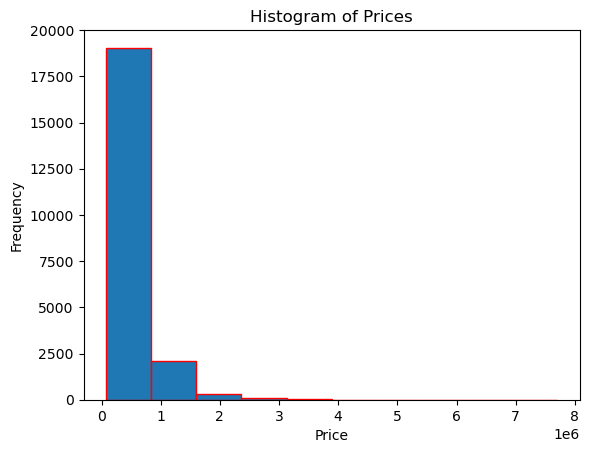

In [91]:
# Plotting a histogram of price

plt.hist(df["price"], bins=10, edgecolor='red')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
plt.savefig('Visualization1')

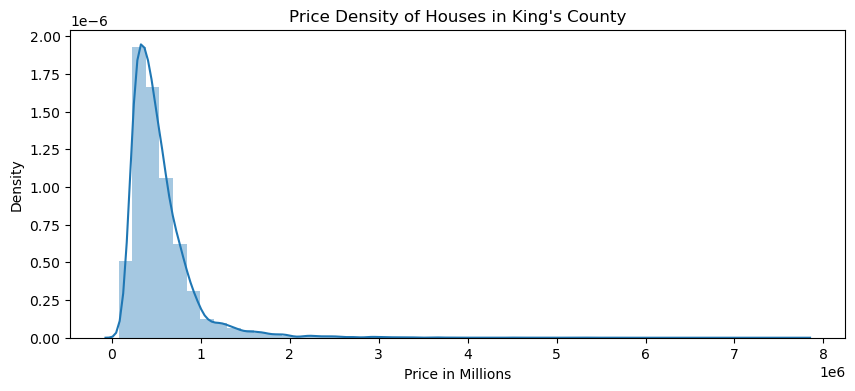

In [92]:
# Plotting a histogram/kernel density estimate of price

plt.figure(figsize=(10,4))

price_dist = sns.distplot(df["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.savefig('Visualization2')

The observation reveals that the distribution of house prices is right-skewed. This means that there are a large number of houses that are relatively not expensive, but there are also a small number of houses that are very expensive.

## Checking for linearity.

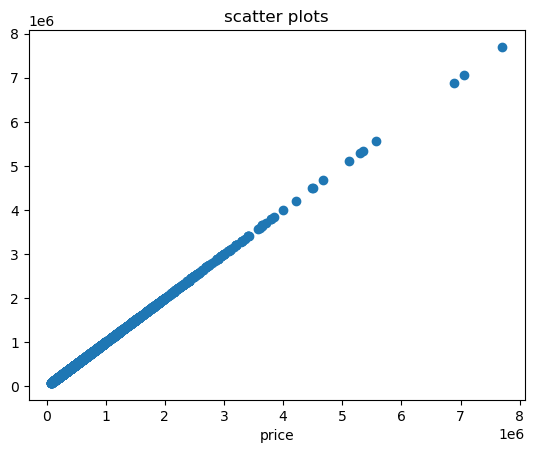

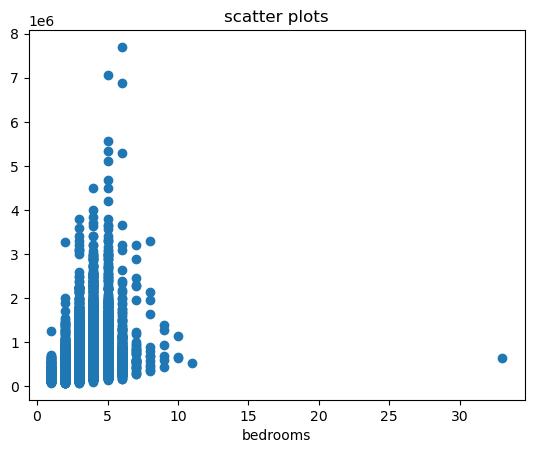

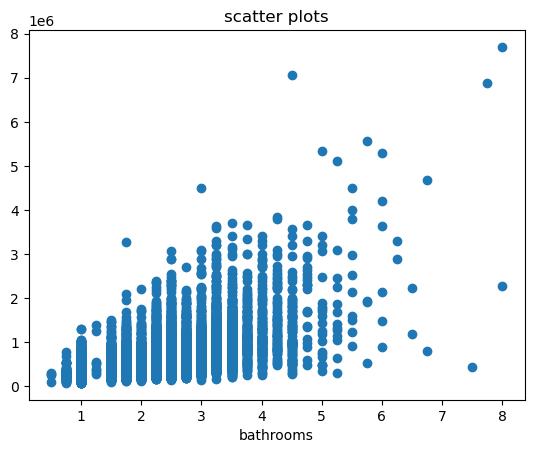

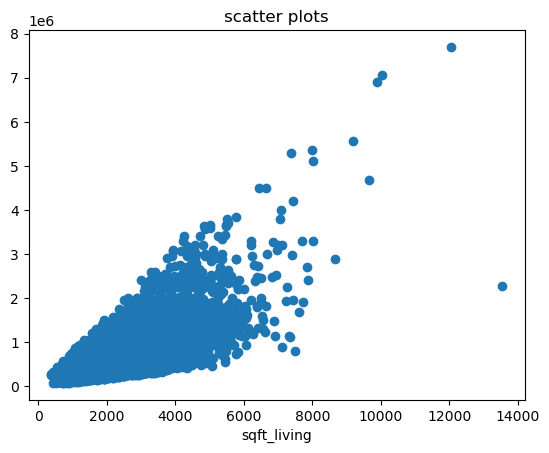

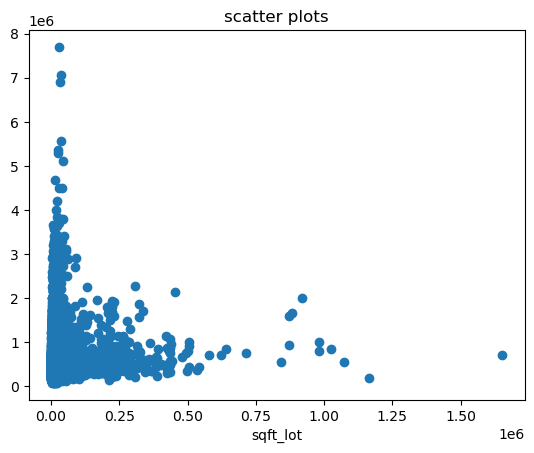

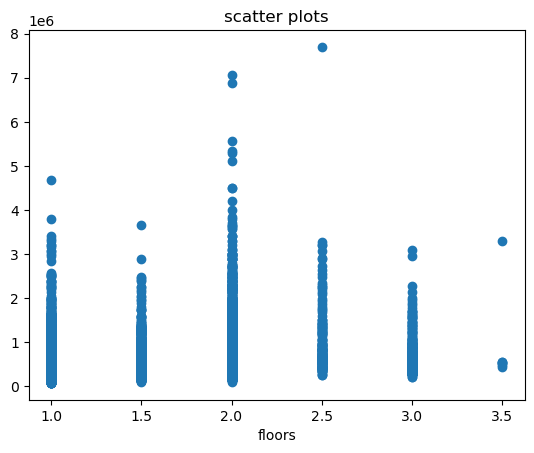

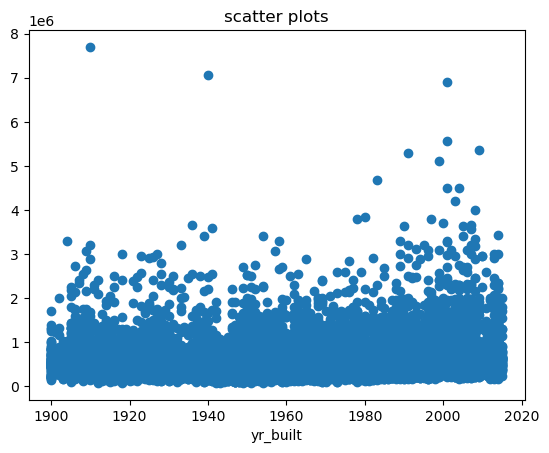

In [93]:
for column in Numeric:
# plot scatter plots for each item in the numeric list.    
    plt.scatter(df[column], df['price'])
# set labels and title
    plt.xlabel(column)
    plt.title('scatter plots')
# display the plot.
    plt.show()


The variables sqft_living and bathrooms exhibit a nearly linear relationship, while the remaining variables demonstrate a discontinuous relationship with the target variable.

## Checking for outliers

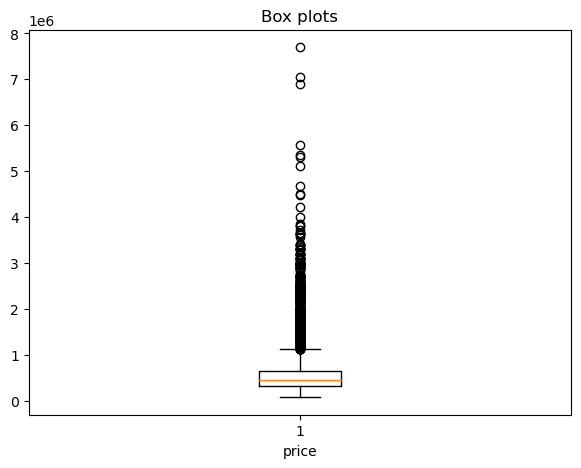

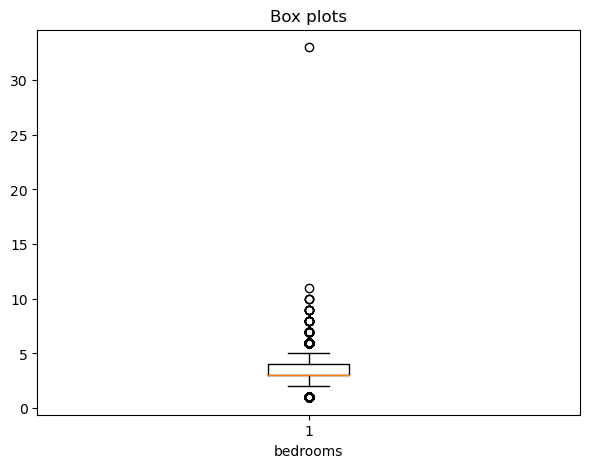

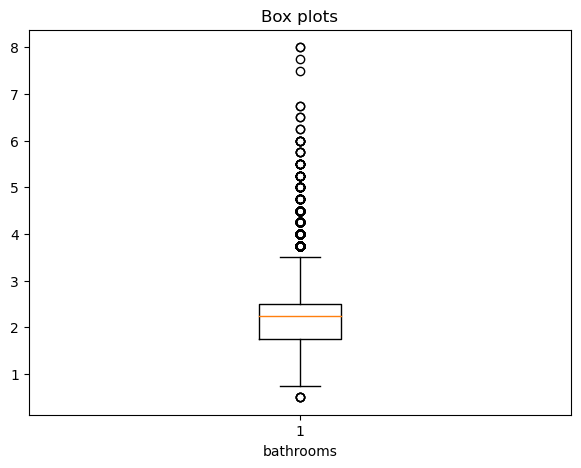

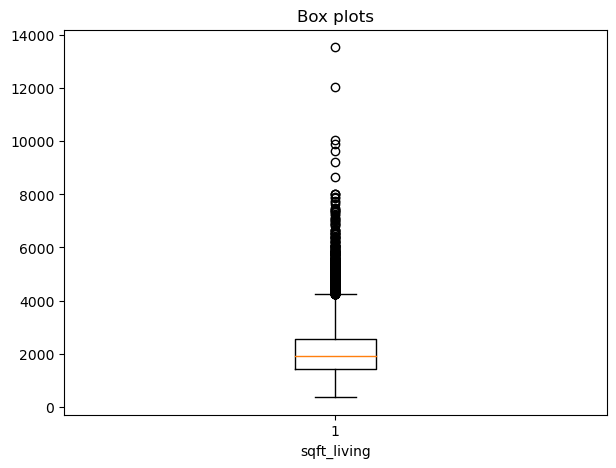

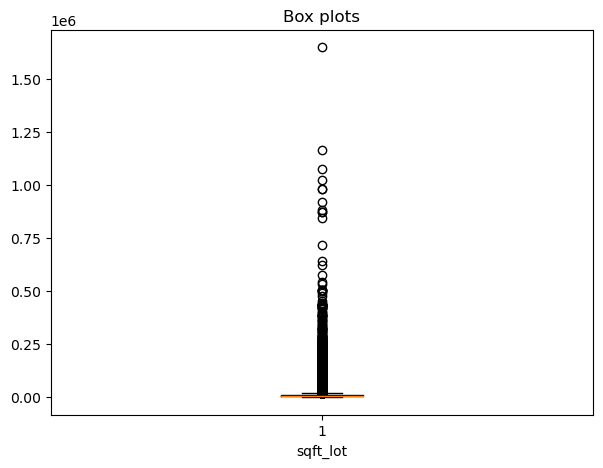

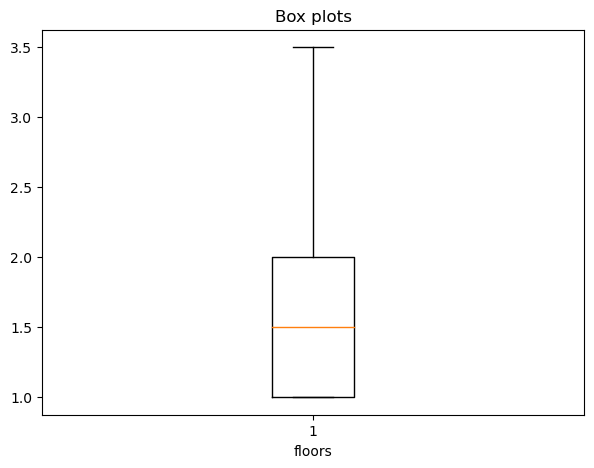

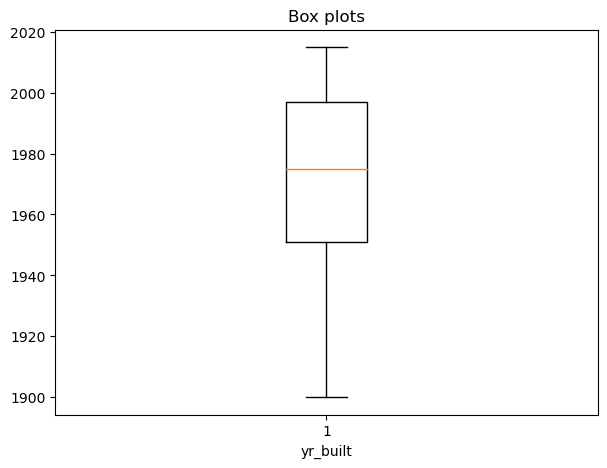

In [94]:
for column in Numeric:
    # plot the boxplots
    plt.figure(figsize = (7,5))
    plt.boxplot(df[column])
    # set the axes and title
    plt.xlabel(column)
    plt.title('Box plots')
    # display the plot
    plt.show()

In [136]:
# dealing with outliers
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

## Univariate analysis for categorical columns.

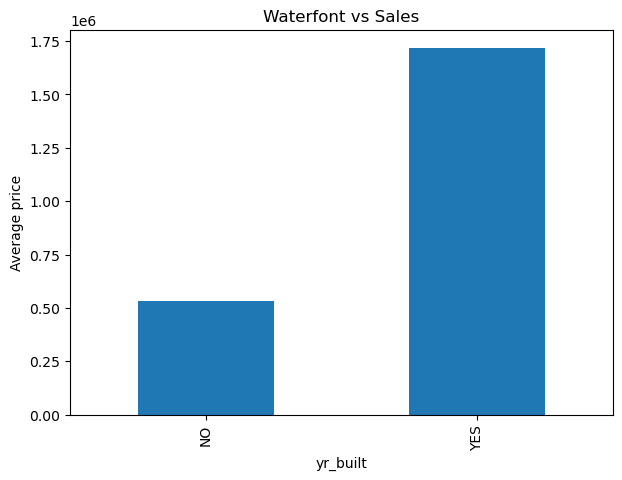

In [95]:
Categorical = ['waterfront', 'condition', 'grade'] 

# How waterfront relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
df.groupby('waterfront')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Waterfont vs Sales')

# display the plot
plt.show()

Based on the plot above it is clear that houses with waterfronts are most popular and sell the most.

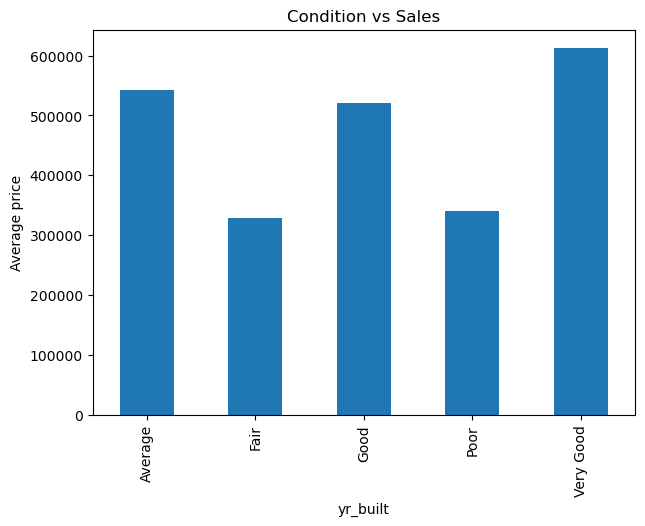

In [96]:
# How condition relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
df.groupby('condition')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Condition vs Sales')

# display the plot
plt.show()

Based on the plot above it is clear that houses that are in good conditions are most popular and sell the most.

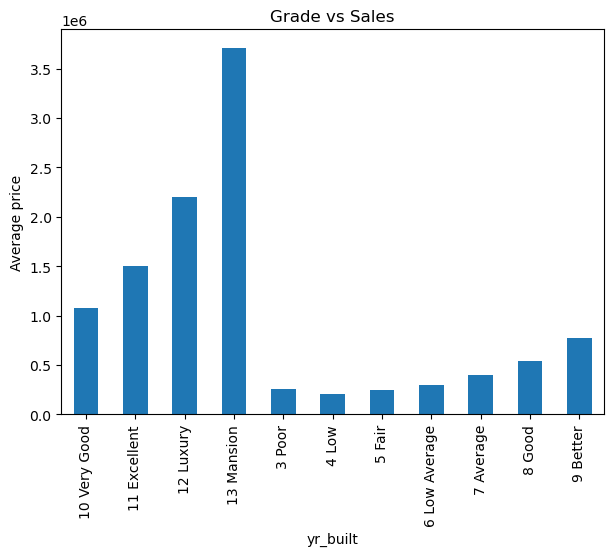

In [97]:
# How grade relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
df.groupby('grade')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Grade vs Sales')

# display the plot
plt.show()


From the plot above it is very clear that mansions are the most popular and are the hghest selling as compared to the others

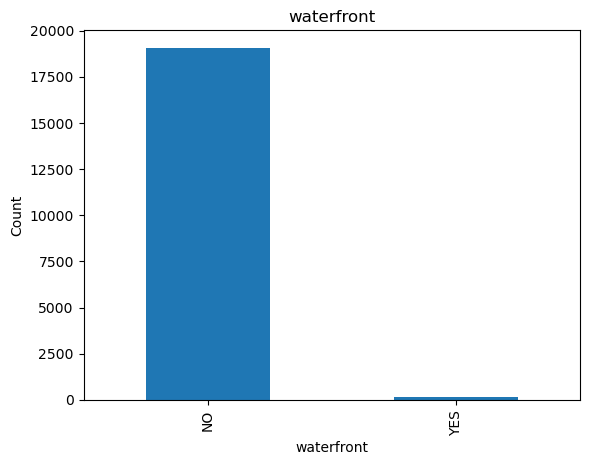

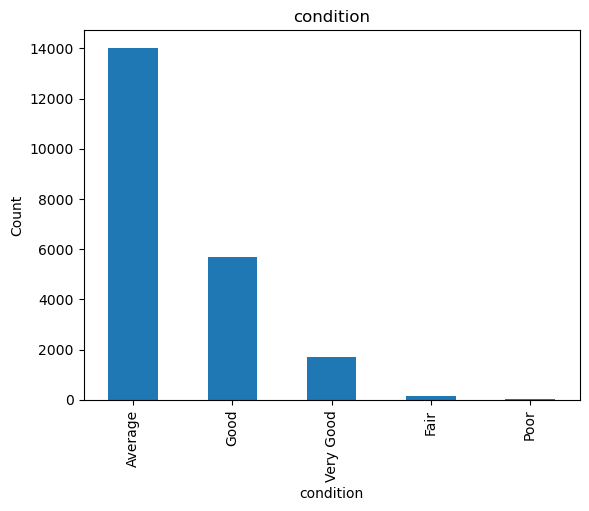

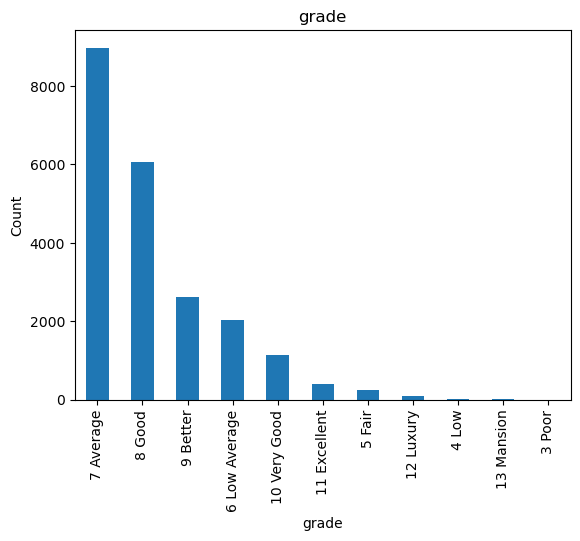

In [98]:
for column in Categorical:
    plt.figure()
    df[column].value_counts().plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

## Bivariate Analysis

Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use scatterplot to check on correlation and collinearity of the variables.

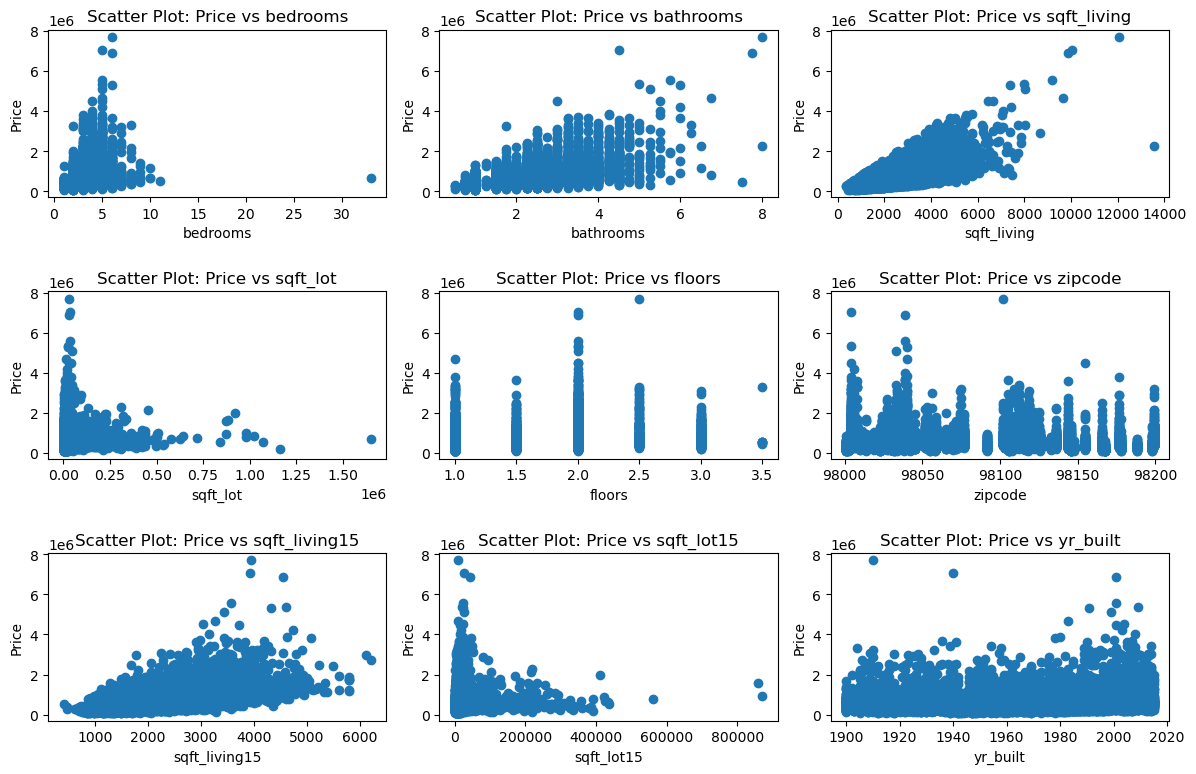

In [135]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','zipcode', 'sqft_living15','sqft_lot15','yr_built']

# Set the figure size and grid layout
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Perform bivariate analysis for each feature
for i, feature in enumerate(features):
# Calculate the row and column index
    row = i // 3
    col = i % 3
# Scatter Plot
    axs[row, col].scatter(df[feature], df['price'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title('Scatter Plot: Price vs ' + feature)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('Visualization')

The data indicates a strong correlation between the square footage of living space and price, suggesting that as the living space area increases, the price tends to rise accordingly.